Całkowanie numeryczne równoległe

In [ ]:
from multiprocessing import Process, Queue
from numpy import linspace, pi
from numpy.lib.scimath import sqrt
from timeit import default_timer as timer

def call_rectangular_rule(fun, a, b, q):
  x = (b + a) / 2.0
  y = fun(x)
  I = (b - a) * y
  q.put(I)

def main():

  npr = 1000

  start = timer()

  def crc(x):
    return x

  intlen = 1.0/npr
  queues = [Queue() for _ in range(npr)]
  procs = []
  (left, right) = (0, intlen)
  right = intlen
  print("intlen")
  print(intlen)
  for k in range(1, npr+1):
    procs.append(Process(target=call_rectangular_rule, args = (crc, left, right, queues[k-1])))
    (left, right) = (left+intlen, right+intlen)

  for process in procs:

    process.start()

  for process in procs:
    process.join()

  calka = 0
  for q in queues:
    calka += q.get()

  print("calka")
  print(calka)

  end = timer()

  print(f'elapsed time: {end - start}')

if __name__ == '__main__':
  main()

intlen
0.001
calka
0.5000000000000004
elapsed time: 69.01513015699993


Całkowanie numeryczne szeregowe

In [ ]:
from multiprocessing import Process, Queue
from numpy import linspace, pi
from numpy.lib.scimath import sqrt
from timeit import default_timer as timer

def call_rectangular_rule(fun, a, b, q):
  x = (b + a) / 2.0
  y = fun(x)
  I = (b - a) * y
  q.put(I)

def main():

  npr = 1000

  start = timer()

  def crc(x):
    return x

  intlen = 1.0/npr
  queues = [Queue() for _ in range(npr)]
  procs = []
  (left, right) = (0, intlen)
  right = intlen
  print("intlen")
  print(intlen)
  for k in range(1, npr+1):
    call_rectangular_rule(crc, left, right, queues[k-1])
    (left, right) = (left+intlen, right+intlen)

  calka = 0
  for q in queues:
    calka += q.get()

  print("calka")
  print(calka)

  end = timer()

  print(f'elapsed time: {end - start}')

if __name__ == '__main__':
  main()

intlen
0.001
calka
0.5000000000000004
elapsed time: 0.47412462099964614


![asd](https://drive.google.com/uc?export=view&id=1gOhnpeo_KjyTCwqHpzUGOKeRygEQT7GH)

Obliczanie pola koła metodą Monte Carlo równoległe

In [ ]:
from multiprocessing import Pool, cpu_count
from random import random
from math import sqrt
from timeit import default_timer as timer

def pi_part(n):

    count = 0

    for i in range(int(n)):

        x, y = random(), random()
        r = sqrt(pow(x, 2) + pow(y, 2))

        if r < 1:
            count += 1

    return count

def main():

    start = timer()

    np = cpu_count()

    n = 20_000_000

    part_count = [n/np for i in range(np)]

    with Pool(processes=np) as pool:

      count = pool.map(pi_part, part_count)
      pi_est = sum(count) / (n * 1.0) * 4

    end = timer()

    print(f'elapsed time: {end - start}')
    print(f'n estimate: {pi_est}')

if __name__ == '__main__':
    main()


elapsed time: 13.111337033999007
n estimate: 3.1418354


Obliczanie pola koła metodą Monte Carlo szeregowe

In [ ]:
from multiprocessing import Process, Queue
from random import random
from math import sqrt
from timeit import default_timer as timer

def pi(n):

  count = 0

  for i in range(n):
    x, y = random(), random()
    r = sqrt(pow(x, 2) + pow(y, 2))

    if r < 1:
      count += 1

  return 4 * count / n

def main():

  start = timer()
  pi_est = pi(20_000_000)
  end = timer()

  print(f'elapsed time: {end - start}')
  print(f'n estimate: {pi_est}')

if __name__ == '__main__':
  main()

elapsed time: 15.416719942000782
n estimate: 3.1414952


![asd](https://drive.google.com/uc?export=view&id=1NaUGA4axdctt76gqf7kUqAPYcb8KHoa1)

Fraktale Mandelbrota i Julii szeregowe

Szeregowy Mandelbrot - elapsed time: 1.2702966689999897 seconds


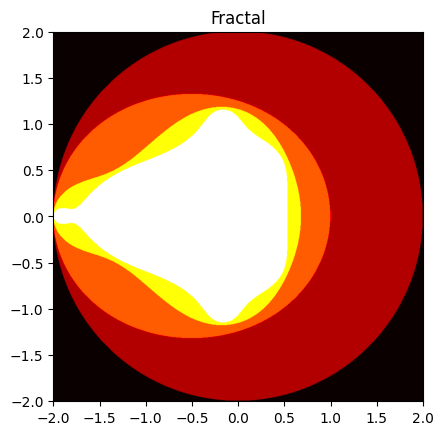

Szeregowy Julia - elapsed time: 2.575724609000005 seconds


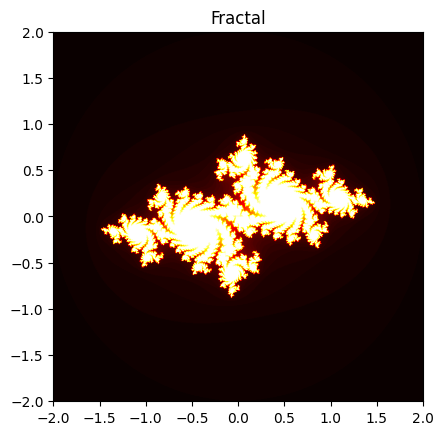

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z**2 + c
        n += 1
    return n

def generate_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter):
    mandelbrot_set = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            x = x_min + (x_max - x_min) * j / (width - 1)
            y = y_min + (y_max - y_min) * i / (height - 1)
            c = x + 1j * y
            mandelbrot_set[i, j] = mandelbrot(c, max_iter)

    return mandelbrot_set

def plot_fractal(fractal_set):
    plt.imshow(fractal_set, cmap='hot', extent=(-2, 2, -2, 2))
    plt.title('Fractal')
    plt.show()

def main_mandelbrot():
    width, height = 800, 800
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    max_iter = 2000

    start = timer()
    mandelbrot_set = generate_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter)
    end = timer()

    print(f'Szeregowy Mandelbrot - elapsed time: {end - start} seconds')

    plot_fractal(mandelbrot_set)


def julia(z, c, max_iter):
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z**2 + c
        n += 1
    return n

def generate_julia(width, height, x_min, x_max, y_min, y_max, c, max_iter):
    julia_set = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            x = x_min + (x_max - x_min) * j / (width - 1)
            y = y_min + (y_max - y_min) * i / (height - 1)
            z = x + 1j * y
            julia_set[i, j] = julia(z, c, max_iter)

    return julia_set

def main_julia():
    width, height = 800, 800
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    c = -0.7 + 0.27015j
    max_iter = 100

    start = timer()
    julia_set = generate_julia(width, height, x_min, x_max, y_min, y_max, c, max_iter)
    end = timer()

    print(f'Szeregowy Julia - elapsed time: {end - start} seconds')

    plot_fractal(julia_set)

if __name__ == '__main__':
    main_mandelbrot()
    main_julia()


Fraktale Manderbrota i Julii równoległe

Równoległy Mandelbrot - elapsed time: 43.79081035499985 seconds


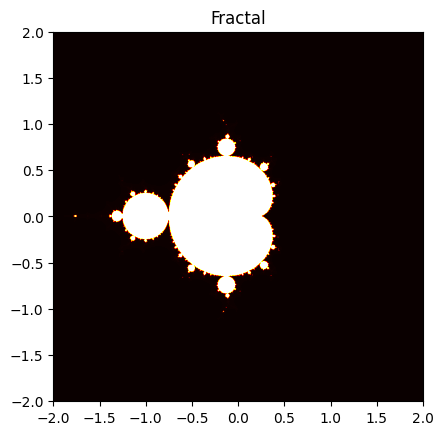

Równoległy Julia - elapsed time: 3.3585704190008983 seconds


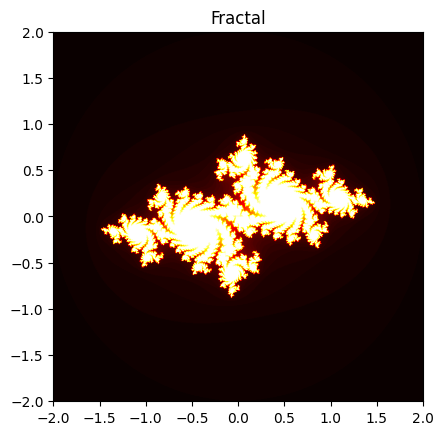

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from multiprocessing import Pool

def mandelbrot_part(args):
    (i, j, height, width, x_min, x_max, y_min, y_max, max_iter) = args
    x = x_min + (x_max - x_min) * j / (width - 1)
    y = y_min + (y_max - y_min) * i / (height - 1)
    c = x + 1j * y
    return mandelbrot(c, max_iter)

def generate_mandelbrot_parallel(width, height, x_min, x_max, y_min, y_max, max_iter, num_processes):
    pool = Pool(num_processes)

    args_list = [(i, j, height, width, x_min, x_max, y_min, y_max, max_iter) for i in range(height) for j in range(width)]
    mandelbrot_set_parallel = np.array(pool.map(mandelbrot_part, args_list)).reshape((height, width))

    pool.close()
    pool.join()

    return mandelbrot_set_parallel

def main_mandelbrot_parallel():
    width, height = 800, 800
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    max_iter = 2000
    num_processes = 4

    start = timer()
    mandelbrot_set_parallel = generate_mandelbrot_parallel(width, height, x_min, x_max, y_min, y_max, max_iter, num_processes)
    end = timer()

    print(f'Równoległy Mandelbrot - elapsed time: {end - start} seconds')

    plot_fractal(mandelbrot_set_parallel)

def julia_part(args):
    (i, j, height, width, x_min, x_max, y_min, y_max, c, max_iter) = args
    x = x_min + (x_max - x_min) * j / (width - 1)
    y = y_min + (y_max - y_min) * i / (height - 1)
    z = x + 1j * y
    return julia(z, c, max_iter)

def generate_julia_parallel(width, height, x_min, x_max, y_min, y_max, c, max_iter, num_processes):
    pool = Pool(num_processes)

    args_list = [(i, j, height, width, x_min, x_max, y_min, y_max, c, max_iter) for i in range(height) for j in range(width)]
    julia_set_parallel = np.array(pool.map(julia_part, args_list)).reshape((height, width))

    pool.close()
    pool.join()

    return julia_set_parallel

def main_julia_parallel():
    width, height = 800, 800
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    c = -0.7 + 0.27015j
    max_iter = 100
    num_processes = 4

    start = timer()
    julia_set_parallel = generate_julia_parallel(width, height, x_min, x_max, y_min, y_max, c, max_iter, num_processes)
    end = timer()

    print(f'Równoległy Julia - elapsed time: {end - start} seconds')

    plot_fractal(julia_set_parallel)

if __name__ == '__main__':
    main_mandelbrot_parallel()
    main_julia_parallel()


![asd](https://drive.google.com/uc?export=view&id=1X5c3PiacLDFt8C5EmLzo5OdgnoKdDZkb)

Sumowanie sumy elementów tablicy wariant szeregowy

In [ ]:
from timeit import default_timer as timer

def array_sum(arr):
    total_sum = 0
    for element in arr:
        total_sum += element
    return total_sum

def main():
    arr = [i + 1 for i in range(0, 100000000)]

    start = timer()
    result = array_sum(arr)
    end = timer()

    print(f'Szeregowy wynik: {result}, czas: {end - start} s')

if __name__ == '__main__':
    main()


Szeregowy wynik: 5000000050000000, czas: 5.131655215001956 s


Sumowanie elementów tablicy wariant równoległy

In [ ]:
from multiprocessing import Pool
from timeit import default_timer as timer

def array_sum(chunk):
    return sum(chunk)

def main():
    arr = [i + 1 for i in range(0, 100000000)]

    chunk_size = len(arr) // 2  # podział na dwie części dla przykładu

    chunks = [arr[i:i+chunk_size] for i in range(0, len(arr), chunk_size)]

    pool = Pool(processes=2)  # liczba procesów równa liczbie części

    start = timer()
    results = pool.map(array_sum, chunks)
    total_sum = sum(results)
    end = timer()

    print(f'Równoległy wynik: {total_sum}, czas: {end - start} s')

if __name__ == '__main__':
    main()


Równoległy wynik: 5000000050000000, czas: 11.043175051996514 s


![asd](https://drive.google.com/uc?export=view&id=1ibkAHwKUaiXuVGU2oQ8b3iXjuNG1Dhd_)